In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
# Reading the dataset

df = pd.read_csv('https://datahack-prod.s3.amazonaws.com/train_file/train_v9rqX0R.csv')

In [3]:
# Visualizing how data looks

df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [4]:
# Fetching metadata for dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Observations:

1. This data set has 12 columns and 8523 rows.

2. 'Item_Weight' and 'Outlet_size' have null values.

# Data Exploration

In [5]:
# Statistics information for dataset

df.describe(include = 'all').T

count unique                    top  freq      mean  \
Item_Identifier            8523   1559                  FDG33    10       NaN   
Item_Weight                7060    NaN                    NaN   NaN   12.8576   
Item_Fat_Content           8523      5                Low Fat  5089       NaN   
Item_Visibility            8523    NaN                    NaN   NaN  0.066132   
Item_Type                  8523     16  Fruits and Vegetables  1232       NaN   
Item_MRP                   8523    NaN                    NaN   NaN   140.993   
Outlet_Identifier          8523     10                 OUT027   935       NaN   
Outlet_Establishment_Year  8523    NaN                    NaN   NaN   1997.83   
Outlet_Size                6113      3                 Medium  2793       NaN   
Outlet_Location_Type       8523      3                 Tier 3  3350       NaN   
Outlet_Type                8523      4      Supermarket Type1  5577       NaN   
Item_Outlet_Sales          8523    NaN                    NaN   NaN   2181.29   

                                 std    min        25%        50%        75%  \
Item_Identifier                  NaN    NaN        NaN        NaN        NaN   
Item_Weight                  4.64346  4.555    8.77375       12.6      16.85   
Item_Fat_Content                 NaN    NaN        NaN        NaN        NaN   
Item_Visibility            0.0515978      0  0.0269895  0.0539309  0.0945853   
Item_Type                        NaN    NaN        NaN        NaN        NaN   
Item_MRP                     62.2751  31.29    93.8265    143.013    185.644   
Outlet_Identifier                NaN    NaN        NaN        NaN        NaN   
Outlet_Establishment_Year    8.37176   1985       1987       1999       2004   
Outlet_Size                      NaN    NaN        NaN        NaN        NaN   
Outlet_Location_Type             NaN    NaN        NaN        NaN        NaN   
Outlet_Type                      NaN    NaN        NaN        NaN        NaN   
Item_Outlet_Sales             1706.5  33.29    834.247    1794.33     3101.3   

                                max  
Item_Identifier                 NaN  
Item_Weight                   21.35  
Item_Fat_Content                NaN  
Item_Visibility            0.328391  
Item_Type                       NaN  
Item_MRP                    266.888  
Outlet_Identifier               NaN  
Outlet_Establishment_Year      2009  
Outlet_Size                     NaN  
Outlet_Location_Type            NaN  
Outlet_Type                     NaN  
Item_Outlet_Sales             13087

In [6]:
# Selecting multiple Column where Interested

df[['Outlet_Location_Type' , 'Item_Outlet_Sales']].head()

Outlet_Location_Type  Item_Outlet_Sales
0               Tier 1          3735.1380
1               Tier 3           443.4228
2               Tier 1          2097.2700
3               Tier 3           732.3800
4               Tier 3           994.7052

In [7]:
# Selecting columns by position. Fetching all rows for first two columns

df.iloc[:, :2]

Item_Identifier  Item_Weight
0              FDA15        9.300
1              DRC01        5.920
2              FDN15       17.500
3              FDX07       19.200
4              NCD19        8.930
...              ...          ...
8518           FDF22        6.865
8519           FDS36        8.380
8520           NCJ29       10.600
8521           FDN46        7.210
8522           DRG01       14.800

[8523 rows x 2 columns]

In [8]:
# slicing rows based on some conditions. Here i need Item_outlet_sales > 3000.
# Creating a new df_slice from existing so that actual data is not disturbed.

df_slice = df[df['Item_Outlet_Sales'] > 3000]
df_slice.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0            FDA15         9.30          Low Fat         0.016047   
7            FDP10          NaN          Low Fat         0.127470   
9            FDU28        19.20          Regular         0.094450   
20           FDN22        18.85          Regular         0.138190   
21           FDW12          NaN          Regular         0.035400   

       Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
0          Dairy  249.8092            OUT049                       1999   
7    Snack Foods  107.7622            OUT027                       1985   
9   Frozen Foods  187.8214            OUT017                       2007   
20   Snack Foods  250.8724            OUT013                       1987   
21  Baking Goods  144.5444            OUT027                       1985   

   Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
0       Medium               Tier 1  Supermarket Type1          3735.1380  
7       Medium               Tier 3  Supermarket Type3          4022.7636  
9          NaN               Tier 2  Supermarket Type1          4710.5350  
20        High               Tier 3  Supermarket Type1          3775.0860  
21      Medium               Tier 3  Supermarket Type3          4064.0432

# Univariate analysis:
 - Item_outlet_sales
 - Outlet_size
 - Item_type
 - Item_Weight
 - Item_MRP
 - Outlet_type
 - Outlet_location_type
 - Item_Fat_Content


In [9]:
#Plotting histogram for 'Item_Outlet_Sales' column.

px.histogram(df,'Item_Outlet_Sales')

In [10]:
# looking at 'Item_Outlet_Sales' Statistics to get a better visualization.
df['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [11]:
#Box plotting to visualize IQR and data distribution w.r.t sales

px.box(df, 'Item_Outlet_Sales')

# Observation:  (Item_Outlet_Sales)

1. Range has high diversity from Min value of 33.29 to max value of 13086

2. Clearly boxplot shows number of outliers above 6478.

3. Majority of sales is within 33.29 and 6478.

# Inferences: (Item_Outlet_Sales)

1. Sales is dependent upon many factors such as tiers, outlet size, location and vintage. 
    So Univariate analysis won't reflect full picture.

2. We have to check further when we do Bivariate analysis.

In [12]:
# Importing lib for plotting 

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
# Reading 'Outlet_Type' 

df.sort_values(by = 'Outlet_Type', ascending = True, inplace = True)
df['Outlet_Type']

3993        Grocery Store
3055        Grocery Store
5057        Grocery Store
1291        Grocery Store
5050        Grocery Store
              ...        
2863    Supermarket Type3
5286    Supermarket Type3
2864    Supermarket Type3
6334    Supermarket Type3
6257    Supermarket Type3
Name: Outlet_Type, Length: 8523, dtype: object

In [14]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [15]:
df['Outlet_Type'].describe()

count                  8523
unique                    4
top       Supermarket Type1
freq                   5577
Name: Outlet_Type, dtype: object

# Observations: (Outlet_Type)

1. 'Outlet_Type has 4 categories.

2. 'Supermarket Type1' tops the chart with ~5500 entries.
    This suggest composition of Supermarket Type 1 Outlet is higher in data set.
    
# Inference: (Outlet_Type)

1. 'Supermarket Type1' is contributing in distribution network higher than any other.

2. This has to  be taken care of when we deploy the model.

In [16]:
# Analysing univariate for 'Item_Type'
#  Using .describe function

df['Item_Type'].describe()

count                      8523
unique                       16
top       Fruits and Vegetables
freq                       1232
Name: Item_Type, dtype: object

In [17]:
# Looking how column actual looks

print(df['Item_Type'])

3993           Dairy
3055    Baking Goods
5057          Others
1291    Baking Goods
5050       Household
            ...     
2863    Frozen Foods
5286    Baking Goods
2864           Dairy
6334    Frozen Foods
6257          Canned
Name: Item_Type, Length: 8523, dtype: object


In [18]:
# Collecting Unique values for 'Item_Type'

pd.unique(df['Item_Type'])

array(['Dairy', 'Baking Goods', 'Others', 'Household', 'Canned',
       'Frozen Foods', 'Hard Drinks', 'Fruits and Vegetables',
       'Snack Foods', 'Starchy Foods', 'Health and Hygiene',
       'Soft Drinks', 'Breads', 'Meat', 'Seafood', 'Breakfast'],
      dtype=object)

In [19]:
# learning - you're sorting alphabetical order in here, so don't expect your data to lineup numerically.

df1 = df.sort_values(by = 'Item_Type', ascending = False)

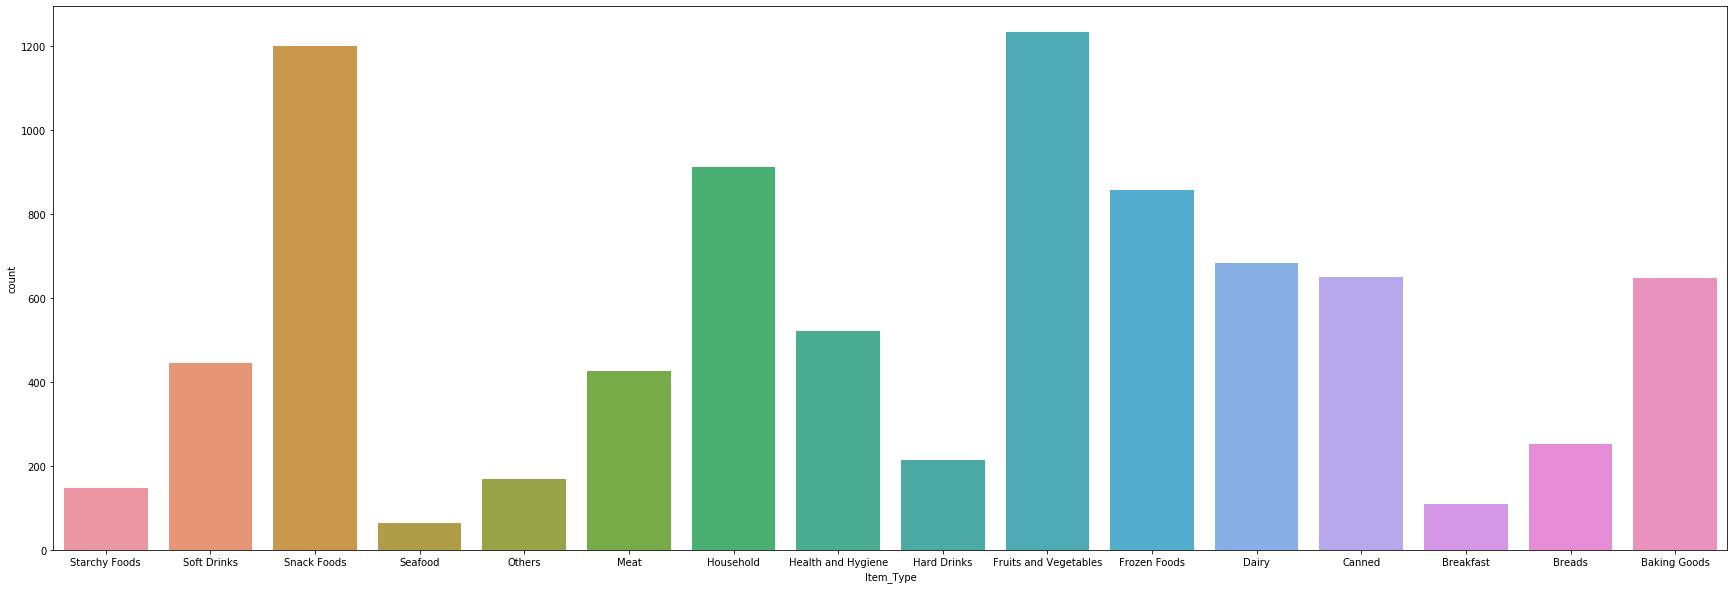

In [20]:
# said so:

plt.figure(figsize=(30,10))
sns.countplot(x = 'Item_Type', data = df1)

In [21]:
# counting values in 'Item_Types'

df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

# Observations : (Item_Type)

1. Dominant Item type is Fruits and Vegetables among dataset.

2. Seafood is mentioned in least number.

# Inferences : (Item_Type)

1. Seafood would not be much popular among customers.
2. maybe there is high demand for perishable items from consumer side.

In [22]:
# Reading 'Item_Fat_Content'

df['Item_Fat_Content'].describe()

count        8523
unique          5
top       Low Fat
freq         5089
Name: Item_Fat_Content, dtype: object

In [23]:
# Observing number of values:

df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

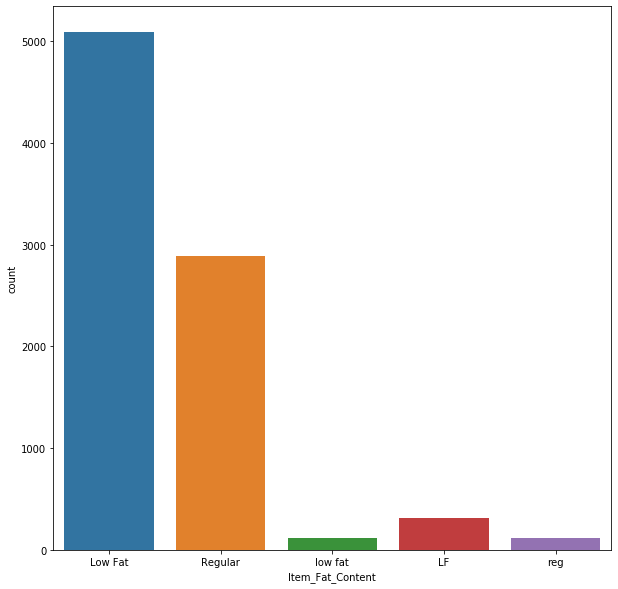

In [24]:
# plotting categorical variables under 'Item_Fat_Content' as bar graphs

plt.figure(figsize = (10,10))
sns.countplot('Item_Fat_Content' , data = df)

# Ask Shreyas about order.

# Observations: (Item_Fat_Content)

1. Low Fat content tops the data.

2. Less popular 'low fat' is present in data, we need more clarity on this.

# Inference : (Item_Fat_Content)

1. Maybe Low Fat content is popular among consumers.

2. We may say that if a product is in low fat content , its probability of selling is greater.

In [25]:
# Analysing 'Item_Weight'

df['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [26]:
# Plotting boxplot of 'Item_Weight'

px.box(df , 'Item_Weight')

In [27]:
# plotting histogram for Item_Weight, as boxplot shows no outliers. We expect same from hist.

px.box(df , 'Item_Weight')

# Observations : (Item_Weight)

1. We are in short of observations regarding 'Item_Weight'. This will be have to taken into consideration while building the model.

2. Values are tightly grouped in 'Item_Weight', we do not get to see Outliers.

# Inferences : (Item_Weight)

1. Item_Weight for different types of items would be different.


In [28]:
# Univariate analysis of 'Item_MRP'

df['Item_MRP']

3993    263.1884
3055    144.8470
5057     55.6588
1291     52.2298
5050    190.1872
          ...   
2863    145.2760
5286     76.7354
2864    196.4794
6334    248.0460
6257     41.2454
Name: Item_MRP, Length: 8523, dtype: float64

In [29]:
# Visualising 'Item_MRP'

px.histogram(df , 'Item_MRP', nbins = 10)

In [30]:
# Statistical information about 'Item_MRP'

df['Item_MRP'].describe()

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

In [31]:
# Box plot for 'Item_MRP'

px.box(df , 'Item_MRP')

# Ask Shreyas about observations and inferences

# observations : (Item_MRP)

1. MRP data looks symmetrical and well distributed.

# Inferences : (Item_MRP)

1. Overall MRP is below 270.

In [32]:
# Univariate for 'Item_Visibility'. It is a factor which shows how much visible is the product within a store.

df['Item_Visibility']

3993    0.247490
3055    0.172365
5057    0.197809
1291    0.223440
5050    0.216478
          ...   
2863    0.000000
5286    0.037450
2864    0.000000
6334    0.130545
6257    0.041049
Name: Item_Visibility, Length: 8523, dtype: float64

In [33]:
# converting 'Item_Visibility' to percentage.

df1 = df.style.format({'Item_Visibility': '{:.2%}'})

# Ask Shreyas how to plot percentage distribution of the same data

In [34]:
# Statistical distribution for 'Item_Visibility'

df['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [35]:
# Histogram for distribution

px.histogram(df, 'Item_Visibility')

In [36]:
# boxplotting the distribution

px.box(df, 'Item_Visibility')

# Observations: ('Item_Visibility)

1. Major counts are under 10% visibility.

2. Outliers above 20% visibility are present.

In [37]:
# 'Outlet_Location_Type'

df['Outlet_Location_Type']

3993    Tier 1
3055    Tier 3
5057    Tier 3
1291    Tier 3
5050    Tier 3
         ...  
2863    Tier 3
5286    Tier 3
2864    Tier 3
6334    Tier 3
6257    Tier 3
Name: Outlet_Location_Type, Length: 8523, dtype: object

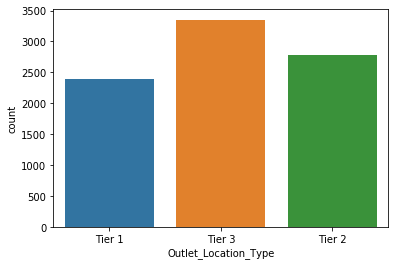

In [38]:
# plotting it in graph

sns.countplot(df['Outlet_Location_Type'])

# Ask Shreyas about the order / sorting and size for the plot.

In [39]:
df['Outlet_Location_Type'].describe()

count       8523
unique         3
top       Tier 3
freq        3350
Name: Outlet_Location_Type, dtype: object

# Observations :(Outlet_Location_Type)

1. Tier 3 tops the Location_Type.

In [40]:
# 'Outlet_Size'

df['Outlet_Size']

3993     Small
3055       NaN
5057       NaN
1291       NaN
5050       NaN
         ...  
2863    Medium
5286    Medium
2864    Medium
6334    Medium
6257    Medium
Name: Outlet_Size, Length: 8523, dtype: object

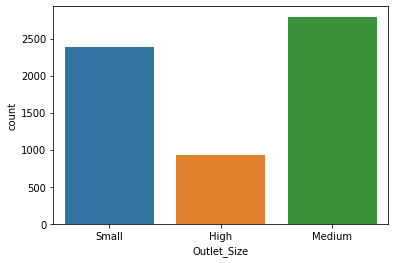

In [41]:
# plotting countplot

sns.countplot(df['Outlet_Size'])

# Observations :

1. Medium size outlets dominate our data set.

In [42]:
# 'Item_Identifier'

df['Item_Identifier'].describe()

count      8523
unique     1559
top       FDW13
freq         10
Name: Item_Identifier, dtype: object

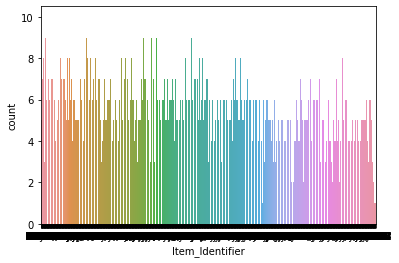

In [43]:
# Plotting 'Item_Identifier'

sns.countplot(df['Item_Identifier'])

px.histogram(df, 'Item_Identifier')

In [44]:
# counting values will let us know why such bizzare countplot:

df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
FDD38     9
FDT07     9
NCQ06     9
         ..
FDK57     1
DRF48     1
FDY43     1
FDQ60     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

# Observations:

1. Item_Identifier has 1559 unique values for Each Item_Type.

In [45]:
# Outlet_Identifier

df['Outlet_Identifier'].describe()

count       8523
unique        10
top       OUT027
freq         935
Name: Outlet_Identifier, dtype: object

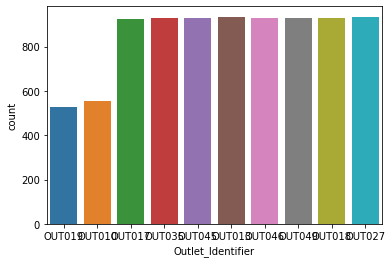

In [46]:
# Plotting for 'Outlet_Identifier'

sns.countplot(df['Outlet_Identifier'])

In [47]:
# Counting values

df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT046    930
OUT049    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

# Observations: (Outlet_Identifier)

1. Outlet_Identifier has 10 unique values for Outlets.

2. OUT027 tops the chart.

# Ask Shreyas what more can be done with this?


In [48]:
# 'Outlet_Establishment_Year'

df['Outlet_Establishment_Year'].describe()

count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64

In [49]:
# Plotting Outlet_Establishment_Year

px.histogram(df, 'Outlet_Establishment_Year')

# Observations : (Outlet_Establishment_Year)

1. This gives the year of Outlet Establishment

2. Spread from 1985 till 2009

                            # END of Univariate #
                            

# Bivariate analysis:


In [50]:
# looking at correlation in our Data.

df.corr()

Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                   1.000000        -0.014048  0.027141   
Item_Visibility              -0.014048         1.000000 -0.001315   
Item_MRP                      0.027141        -0.001315  1.000000   
Outlet_Establishment_Year    -0.011588        -0.074834  0.005020   
Item_Outlet_Sales             0.014123        -0.128625  0.567574   

                           Outlet_Establishment_Year  Item_Outlet_Sales  
Item_Weight                                -0.011588           0.014123  
Item_Visibility                            -0.074834          -0.128625  
Item_MRP                                    0.005020           0.567574  
Outlet_Establishment_Year                   1.000000          -0.049135  
Item_Outlet_Sales                          -0.049135           1.000000

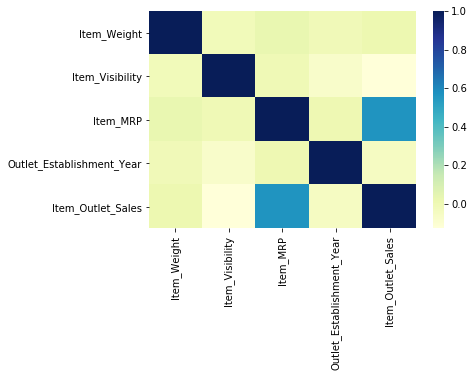

In [51]:
# Heatmap for correlation:
sns.heatmap(df.corr(), cmap="YlGnBu")

# Observations:

1. There is positive correlation between 'Item_Outlet_Sales' and 'Item_MRP'

2. There is positive correlation between 'Item_Outlet_Sales' and 'Item_Visibility'.

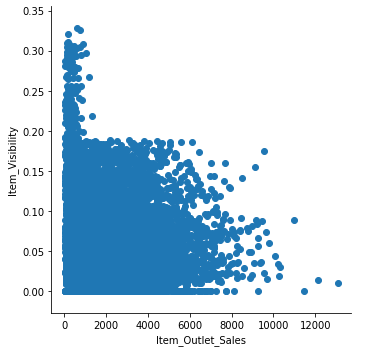

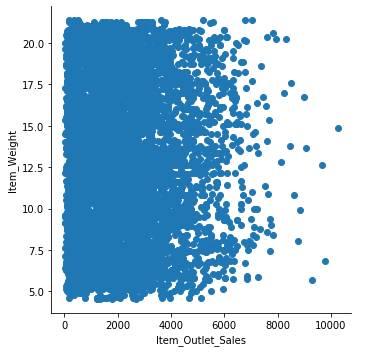

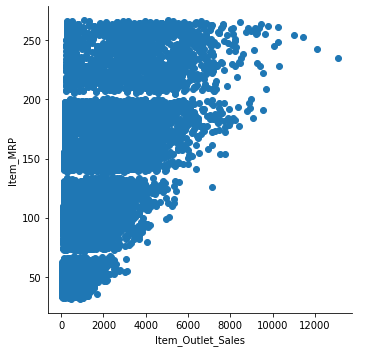

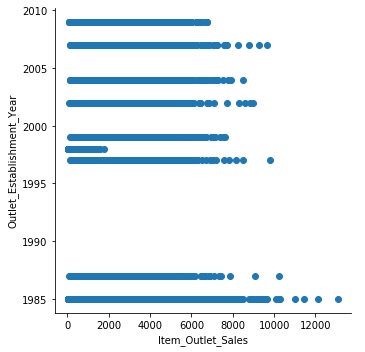

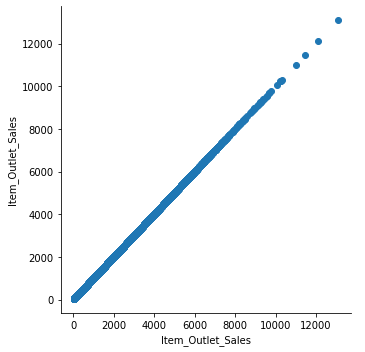

In [52]:
# Here We'll be looking at the effect on Sales:

from scipy import stats

sns.FacetGrid(df, height = 5).map(plt.scatter , 'Item_Outlet_Sales' , 'Item_Visibility').add_legend();
plt.show()
sns.FacetGrid(df, height = 5).map(plt.scatter , 'Item_Outlet_Sales' , 'Item_Weight').add_legend();
plt.show()
sns.FacetGrid(df, height = 5).map(plt.scatter , 'Item_Outlet_Sales' , 'Item_MRP').add_legend();
plt.show()
sns.FacetGrid(df, height = 5).map(plt.scatter , 'Item_Outlet_Sales' , 'Outlet_Establishment_Year').add_legend();
plt.show()
sns.FacetGrid(df, height = 5).map(plt.scatter , 'Item_Outlet_Sales' , 'Item_Outlet_Sales').add_legend();
plt.show()

# Inferences:

1. 'Item_Visibility' vs 'Item_Outlet_Sales' Shows strong positive correlation. Better the visibility, better the sales.

2. 'Item_MRP' and 'Item_Outlet_sales' also show positive correlation. Concluding that higher MRP is equivalent to higher sales would be counterintuitive to consumer behaviour



# Data Preprocessing

In [53]:
# My data has Categorical values and null values which need to be take care of before building a model.

# Dealing with categorical values by label_encode

def label_encode(o_size):
    if o_size == 'Small':
        label = 0
    elif o_size == 'Medium':
        label = 1
    else:
        label = 2
    return label
        
df['Outlet_Size'] = df['Outlet_Size'].apply(lambda x : label_encode(x))

In [54]:
# checking whether label_encode worked

df['Outlet_Size'].describe()

# Ask Shreyas about adding an extra column or working on original Data.

count    8523.000000
mean        1.111932
std         0.812310
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: Outlet_Size, dtype: float64

In [56]:
df

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
3993           FDI15          NaN          Low Fat         0.247490   
3055           FDZ12         9.17          Low Fat         0.172365   
5057           NCJ19        18.60          Low Fat         0.197809   
1291           FDY24         4.88          Regular         0.223440   
5050           NCA30        19.00          Low Fat         0.216478   
...              ...          ...              ...              ...   
2863           FDS16          NaN          Regular         0.000000   
5286           FDK48          NaN          Low Fat         0.037450   
2864           FDS02          NaN          Regular         0.000000   
6334           FDF41          NaN          Low Fat         0.130545   
6257           FDC14          NaN          Regular         0.041049   

         Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
3993         Dairy  263.1884            OUT019                       1985   
3055  Baking Goods  144.8470            OUT010                       1998   
5057        Others   55.6588            OUT010                       1998   
1291  Baking Goods   52.2298            OUT010                       1998   
5050     Household  190.1872            OUT010                       1998   
...            ...       ...               ...                        ...   
2863  Frozen Foods  145.2760            OUT027                       1985   
5286  Baking Goods   76.7354            OUT027                       1985   
2864         Dairy  196.4794            OUT027                       1985   
6334  Frozen Foods  248.0460            OUT027                       1985   
6257        Canned   41.2454            OUT027                       1985   

      Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
3993            0               Tier 1      Grocery Store           529.9768  
3055            2               Tier 3      Grocery Store           572.5880  
5057            2               Tier 3      Grocery Store           114.5176  
1291            2               Tier 3      Grocery Store           161.7894  
5050            2               Tier 3      Grocery Store           567.2616  
...           ...                  ...                ...                ...  
2863            1               Tier 3  Supermarket Type3          5273.1360  
5286            1               Tier 3  Supermarket Type3          2783.7098  
2864            1               Tier 3  Supermarket Type3          5852.3820  
6334            1               Tier 3  Supermarket Type3          7883.0720  
6257            1               Tier 3  Supermarket Type3          1342.2528  

[8523 rows x 12 columns]

                                                # En Progress #